In [7]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from joblib import dump, load
import matplotlib.dates as mdate


In [8]:
df = pd.read_csv("./data/global_last10years.csv")



pd.set_option("display.max_rows", None)


In [68]:
df.columns = df.columns.str.strip()


In [69]:
# Step 2: Clean the '# Bytes' column
df['# Bytes'] = df['# Bytes'].replace('', pd.NA)                # Replace empty strings with NA
df['# Bytes'] = df['# Bytes'].str.replace(',', '', regex=False) # Remove commas if any
df['# Bytes'] = pd.to_numeric(df['# Bytes'], errors='coerce')   # Convert to float, coercing errors to NaN

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 3685 non-null   int64  
 1    # Bytes                  3685 non-null   object 
 2   # Packets                 3623 non-null   float64
 3   # Unique Source IPs       3623 non-null   float64
 4   # Unique Destination IPs  3623 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 144.1+ KB


Timestamp
Number of bytes per hour (daily average), henceforth: #bytes/hour (daily avg.)
Number of packets per hour (daily average), henceforth: #pkts/hour (daily avg.)
Number of unique IP sources per hour (daily average), henceforth: #uIPs/hour (daily avg.)
Number of unique IP destinations per hour (daily average), henceforth: #uIPd/hour (daily avg.)

In [49]:
df = df.drop(labels=None, axis=1, columns=columns)


In [18]:
df.head(5)

,timestamp,# Bytes,# Packets,# Unique Source IPs,# Unique Destination IPs
0,1267315200,165596386.42222,2.762842e+06,337679.421528,1.112684e+06
1,1267401600,163158899.13472,2.806657e+06,329043.744444,1.171486e+06
2,1267488000,157296888.83528,2.674505e+06,307412.260514,1.147834e+06
3,1267574400,161179099.33439,2.766806e+06,342048.445860,1.085382e+06
4,1267660800,161523676.74028,2.789113e+06,335454.297222,1.114030e+06


In [19]:
df.columns

Index(['timestamp', ' # Bytes', '# Packets', '# Unique Source IPs',
       '# Unique Destination IPs'],
      dtype='object')

In [ ]:
#create a list with packets_per_day
ts_packets = df['# Packets'].tolist()
ts_bytes = df['# Bytes'].tolist()
ts_srcips = df['# Unique Source IPs'].tolist()
ts_dstips = df['# Unique Destination IPs'].tolist()



### 🔁 Transformation Pipeline (and WHY)

#### 1. **Epoch Time → Datetime**

```python
raw = pd.to_datetime(df['timestamp'], unit='s')
```

* **Input**: `1270080000` (seconds since 1970-01-01 UTC)
* **Output**: `2010-03-31 00:00:00`
* **Why**: To get something human-readable and to make it easier to format, filter, or resample the data.

---

#### 2. **Datetime → Matplotlib Float**

```python
timestamps = mdate.date2num(raw)
```

* **Input**: `2010-03-31 00:00:00`
* **Output**: `733848.0`
* **What is that?**
  It's the number of **days** since **January 1, year 0001** (matplotlib's internal "origin").
* **Why**: Because Matplotlib’s date plotting system doesn't understand `datetime` directly — it uses **floating point numbers**, where the integer part is the day and the decimal part is the time of day.

---

#### 3. **Matplotlib Float → Formatted String (for axis)**

```python
date_formatter = mdate.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)
```

* **Input**: `733848.0`
* **Output on the plot**: `'10-03-31'`
* **Why**: So you get clean, readable X-axis labels when plotting.

---



In [58]:
    #create a list with the timestamps
    raw = pd.to_datetime(df['timestamp'], unit='s')


    # formating axes, ticks and ticklabels for timestamps
    timestamps = mdate.date2num(raw)


In [59]:
print(raw)

0      2010-02-28
1      2010-03-01
2      2010-03-02
3      2010-03-03
4      2010-03-04
5      2010-03-05
6      2010-03-06
7      2010-03-07
8      2010-03-08
9      2010-03-09
10     2010-03-10
11     2010-03-11
12     2010-03-12
13     2010-03-13
14     2010-03-14
15     2010-03-15
16     2010-03-16
17     2010-03-17
18     2010-03-18
19     2010-03-19
20     2010-03-20
21     2010-03-21
22     2010-03-22
23     2010-03-23
24     2010-03-24
25     2010-03-25
26     2010-03-26
27     2010-03-27
28     2010-03-28
29     2010-03-29
30     2010-03-30
31     2010-03-31
32     2010-04-01
33     2010-04-02
34     2010-04-03
35     2010-04-04
36     2010-04-05
37     2010-04-06
38     2010-04-07
39     2010-04-08
40     2010-04-09
41     2010-04-10
42     2010-04-11
43     2010-04-12
44     2010-04-13
45     2010-04-14
46     2010-04-15
47     2010-04-16
48     2010-04-17
49     2010-04-18
50     2010-04-19
51     2010-04-20
52     2010-04-21
53     2010-04-22
54     2010-04-23
55     201

In [52]:
lists = [ts_packets, ts_bytes, ts_srcips, ts_dstips]
titles = [
    'TCP packets per hour (daily average)',
    'Bytes per hour (daily average)',
    'Unique IP sources per hour (daily average)',
    'Unique IP destinations per hour (daily average)'
]
ylabels = [
    '#pkts/hour',
    '#bytes/hour',
    '#uIPs/hour',
    '#uIPd/hour'
]

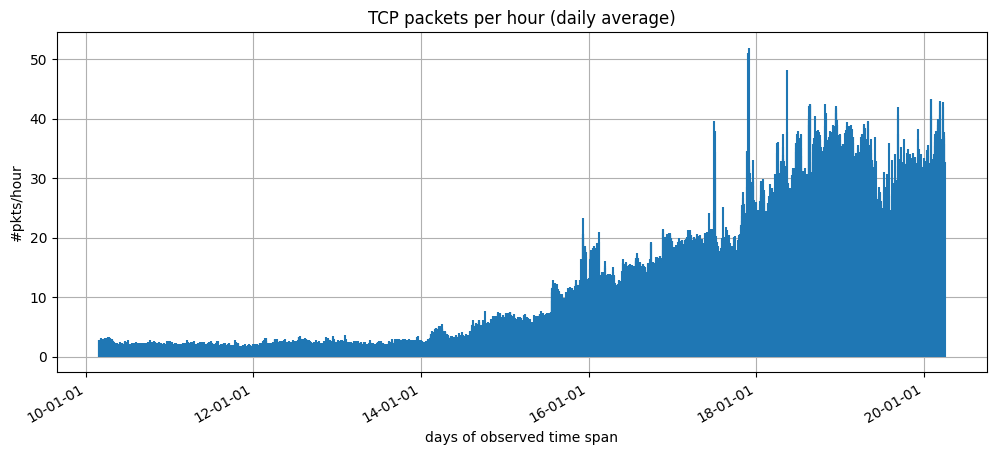

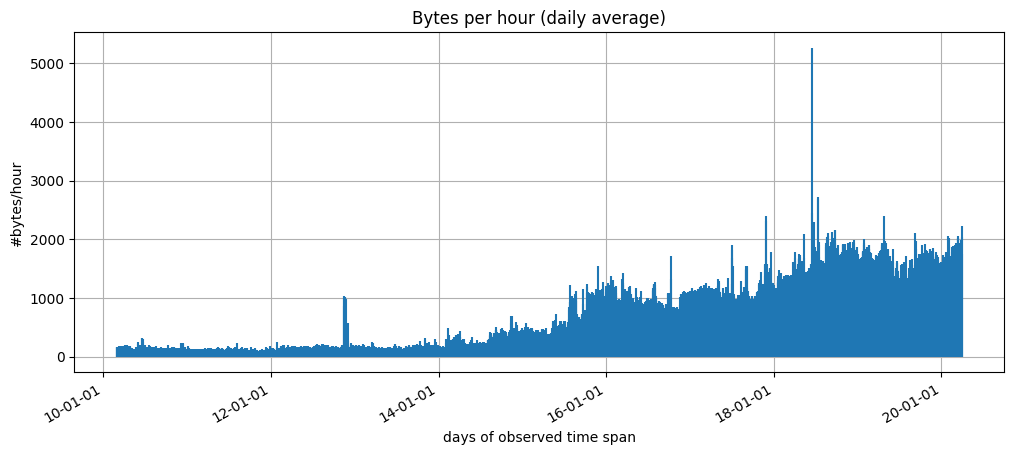

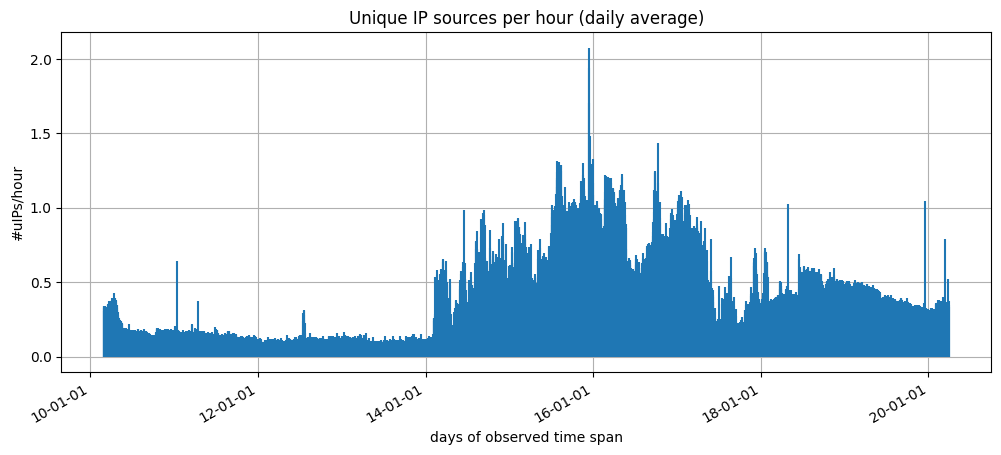

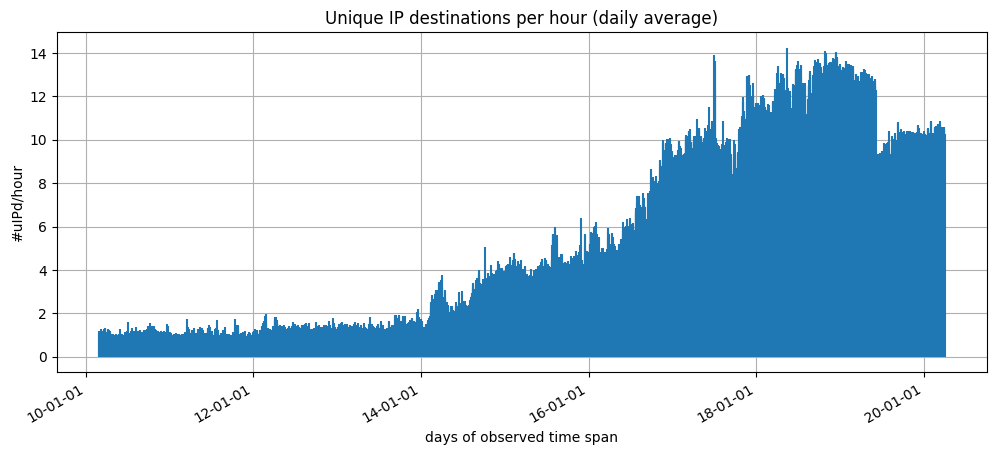

In [61]:
for data, title, ylabel in zip(lists, titles, ylabels):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Format date axis
    date_formatter = mdate.DateFormatter('%y-%m-%d')
    ax.xaxis.set_major_formatter(date_formatter)
    ax.xaxis_date()
    fig.autofmt_xdate()

    # Plot stem graph
    y_values = [x / 1e6 for x in data]  # Convert to millions
    ax.stem(timestamps, y_values, linefmt='C0-', markerfmt=" ", basefmt=" ")

    # Labels and title
    plt.xlabel('days of observed time span')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()

    # Show each plot individually
    plt.show()

handle missing values with the build in pandas function


In [ ]:
df_interpolated = df.interpolate()

In [ ]:
df_interpolated.corr(method='pearson', min_periods=1, numeric_only=False)

,timestamp,# Bytes,# Packets,# Unique Source IPs,# Unique Destination IPs
timestamp,1.000000,0.913867,0.906115,0.466226,0.920741
# Bytes,0.913867,1.000000,0.972758,0.448269,0.943190
# Packets,0.906115,0.972758,1.000000,0.346494,0.965180
# Unique Source IPs,0.466226,0.448269,0.346494,1.000000,0.394498
# Unique Destination IPs,0.920741,0.943190,0.965180,0.394498,1.000000


ave_#uIPd/hour)/(ave_#uIPs/hour)

In [74]:
def show_nan_locations(df):
    nan_rows = df[df.isna().any(axis=1)]  # Rows with at least one NaN
    print(f"Total rows with NaNs: {len(nan_rows)}")
    print("\nNaN counts by column:")
    print(df.isna().sum())
    print("\nRows with NaNs:")
    display(nan_rows.head())  # Works in Jupyter/Colab, use print(nan_rows.head()) otherwise



In [76]:
show_nan_locations(df)


Total rows with NaNs: 62

NaN counts by column:
timestamp                    0
# Bytes                     62
# Packets                   62
# Unique Source IPs         62
# Unique Destination IPs    62
dtype: int64

Rows with NaNs:


,timestamp,# Bytes,# Packets,# Unique Source IPs,# Unique Destination IPs
11,1268265600,NaN,NaN,NaN,NaN
12,1268352000,NaN,NaN,NaN,NaN
13,1268438400,NaN,NaN,NaN,NaN
14,1268524800,NaN,NaN,NaN,NaN
15,1268611200,NaN,NaN,NaN,NaN


In [78]:
df_dropednan = df.dropna()


In [80]:
print(df_dropednan.isna().sum())  # Should show 0 for all columns
print(df_dropednan.shape)         # See new row count


timestamp                   0
# Bytes                     0
# Packets                   0
# Unique Source IPs         0
# Unique Destination IPs    0
dtype: int64
(3623, 5)


In [87]:

ave_uIPd = df_dropednan['# Unique Destination IPs'].median()

ave_uIPs = df_dropednan['# Unique Source IPs'].median()

print(ave_uIPd/ave_uIPs)

10.879117074424991


In [89]:
maxValueIndex = df_dropednan.idxmax()


In [98]:
from datetime import datetime, timezone

print(maxValueIndex)

result = df.loc[2115, "timestamp"]


# Convert to datetime in UTC
dt_utc = datetime.fromtimestamp(result, tz=timezone.utc)

# Format as "day-month-year hour" (24-hour format)
formatted = dt_utc.strftime("%d-%m-%Y %H")
print(formatted)



timestamp                   3684
# Bytes                     3030
# Packets                   2830
# Unique Source IPs         2115
# Unique Destination IPs    2995
dtype: int64
14-12-2015 00


In [10]:
monthly_df = pd.read_csv("./data/team79_monthly.csv")

In [105]:
monthly_df.head()

,timestamps,#packets,#bytes,#unique_IP_sources,#unique_IP_destinations
0,1551394800,3.039767e+07,1746120075.4,425128.783333,1.212288e+07
1,1551398400,2.965575e+07,1455375550.1667,434437.600000,1.233483e+07
2,1551402000,2.930722e+07,1456779247.5,459363.583333,1.222010e+07
3,1551405600,3.016440e+07,1647136005.7333,474004.200000,1.236512e+07
4,1551409200,2.899513e+07,1447333430.55,483489.483333,1.224655e+07


In [106]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamps               743 non-null    int64  
 1   #packets                 662 non-null    float64
 2   #bytes                   743 non-null    object 
 3   #unique_IP_sources       662 non-null    float64
 4   #unique_IP_destinations  662 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [9]:
# Convert timestamp
monthly_df['timestamps'] = pd.to_datetime(monthly_df['timestamps'], unit='s', utc=True)

# Optional: set timestamp as index
monthly_df.set_index('timestamps', inplace=True)

# Ensure all columns are numeric
for col in monthly_df.columns:
    monthly_df[col] = pd.to_numeric(monthly_df[col], errors='coerce')

# Drop or fill NaNs (for stats, we’ll just drop them)
monthly_df.dropna(inplace=True)

NameError: name 'monthly_df' is not defined

In [113]:
table_a = monthly_df.agg(['sum', 'mean', 'median', 'std']).T


In [13]:
# Load global dataset
df.columns = df.columns.str.strip()
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
df.set_index('timestamp', inplace=True)

# Match the time range from monthly_df
start = monthly_df.index.min()
end = monthly_df.index.max()
global_subset = df.loc[start:end]

# Ensure numeric types and drop NaNs
for col in global_subset.columns:
    global_subset[col] = pd.to_numeric(global_subset[col], errors='coerce')
global_subset.dropna(inplace=True)


TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0] of type int

In [11]:
table_b = global_subset.agg(['sum', 'mean', 'median', 'std']).T


NameError: name 'global_subset' is not defined

In [12]:
table_b = global_subset.agg(['sum', 'mean', 'median', 'std']).T
print("\nTable B - Global Stats (Same Time Range):")
print(table_b)


NameError: name 'global_subset' is not defined